In this example we simulate ambiguous resonances in multipulse quantum sensing with nitrogen vacancy (NV) centers in diamonds. This notebook closely follows the work from "Ambiguous Resonances in Multipulse Quantum Sensing with Nitrogen Vacancy Centers" available at https://arxiv.org/abs/2407.09411 . 

As this is a quite complex problem, physics discussions will be kept to a minimum here in favor of a focus to the simulation. For a detailed explanation of the problem, please refer to the original paper.

**Table of contents**<a id='toc0_'></a>    
- 1. [Field Misalignment and $^{15}\text{N}$ Coupling](#toc1_)    
- 2. [13C Couling](#toc2_)    
- 3. [RXY8 with H2](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
import numpy as np
from qutip import tensor, jmat, qeye

from quaccatoo import NV, XY8, RXY8, Analysis

# 1. <a id='toc1_'></a>[Field Misalignment and $^{15}\text{N}$ Coupling](#toc0_)

We begin simulating a XY8-2 sequence with a misaligned magnetic field, as in Sec. IV A of the paper.

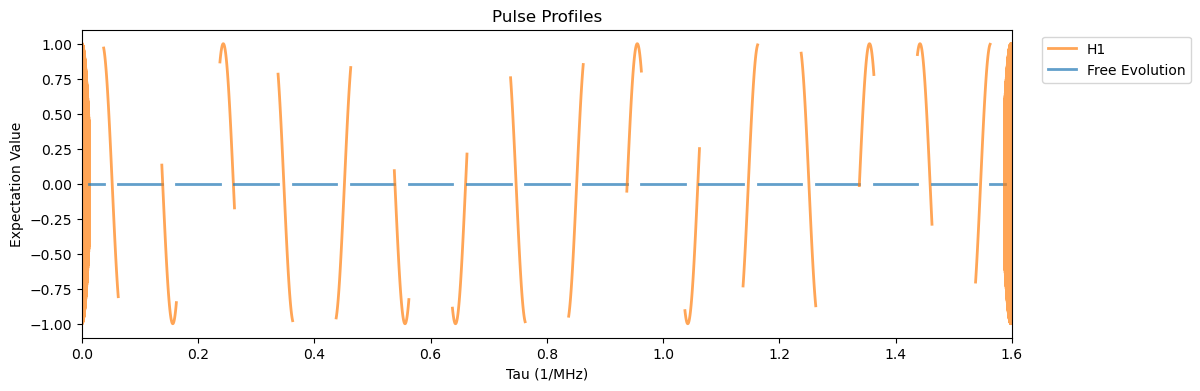

In [ ]:
# define the NV center system
qsys = NV(
    N=15, # here we start considering the 15N nuclear spin
    B0 = 39.4, # external magnetic field in mT
    units_B0='mT',
    theta=2.6,
    units_angles='deg'
)

w1 = 20

XY8_15N  = XY8(
    M=2,
    free_duration = np.linspace(.25, .36, 100), # free evolution time in us
    pi_pulse_duration = 1/2/w1, # pi-pulse duration in us
    system = qsys, # NV center system
    H1 = w1*qsys.MW_H1, # control Hamiltonian
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}, # MW frequency for the ms=0 --> ms=+1 state transition
    time_steps=100 # Number of time steps in each MW pulse
)

# plot the pulses
XY8_15N.plot_pulses(tau=.1, figsize=(12, 4))

Here we can observe the 16 $\pi$-pulses plus the initial and final $\pi/2$ pulses. Now to run the experiment as in Fig. 3 (d).

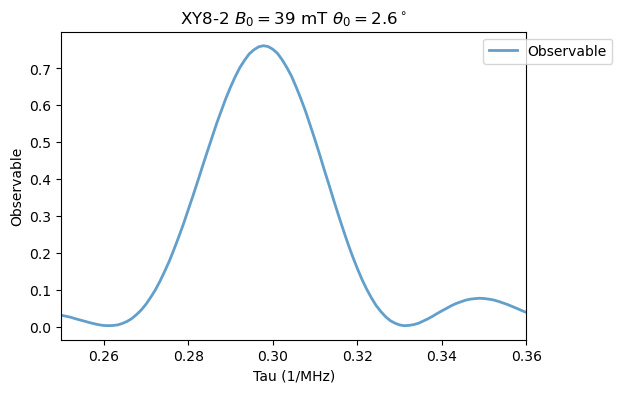

In [ ]:
XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-2 $B_0=39$ mT $\theta_0=2.6^\circ$')

Increasing the XY8 order for M=4,6,8:

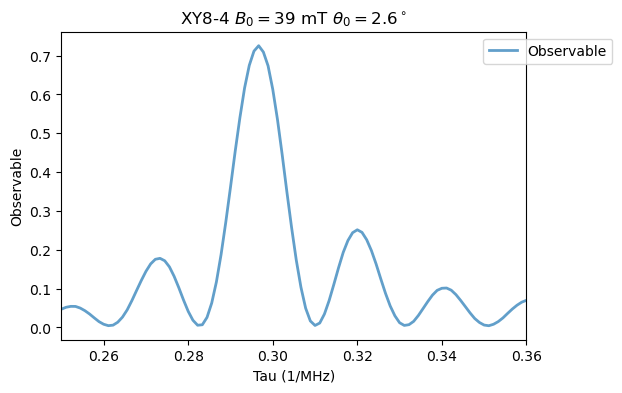

In [4]:
# M = 4
XY8_15N.M = 4
XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-4 $B_0=39$ mT $\theta_0=2.6^\circ$')

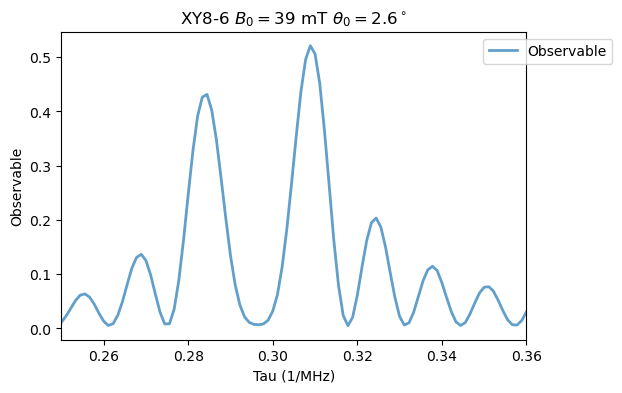

In [5]:
# M = 6
XY8_15N.M = 6
XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-6 $B_0=39$ mT $\theta_0=2.6^\circ$')

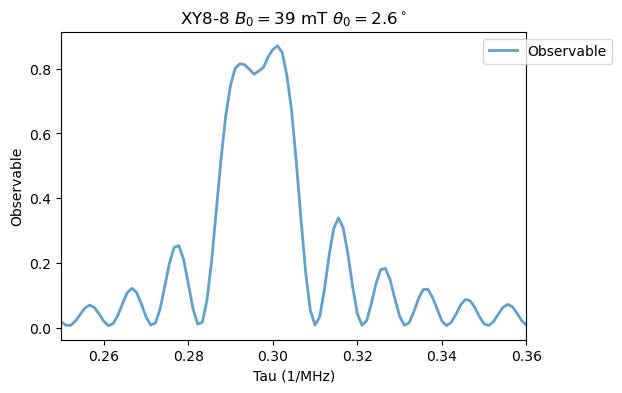

In [6]:
# M = 8
XY8_15N.M = 8
XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-8 $B_0=39$ mT $\theta_0=2.6^\circ$')

Now, changing the field for XY8-2 as in Fig. 3 (c).

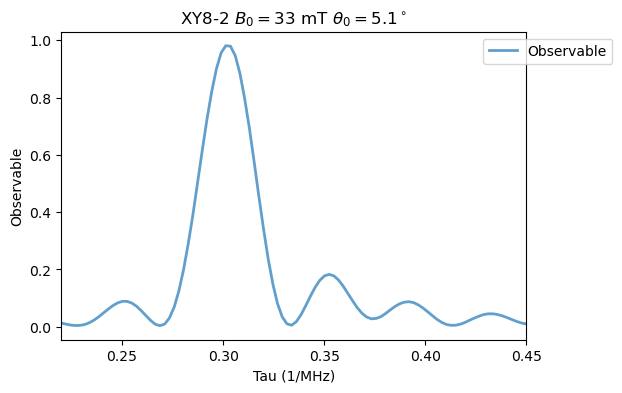

In [7]:
# 33 mT, 5.1 deg
qsys = NV(
    N=15, # here we start considering the 15N nuclear spin
    B0 = 33, # external magnetic field in mT
    units_B0='mT',
    theta=5.1, # 5.1 degrees os misalignment
    units_angles='deg'
)

XY8_15N  = XY8(
    M=2,
    free_duration = np.linspace(.22, .45, 100), # free evolution time in us
    pi_pulse_duration = 1/2/w1, # pi-pulse duration in us
    system = qsys, # NV center system
    H1 = w1*qsys.MW_H1, # control Hamiltonian
    pulse_params = {'f_pulse': qsys.MW_freqs[1]} # MW frequency for the ms=0 --> ms=+1 state transition
)

XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-2 $B_0=33$ mT $\theta_0=5.1^\circ$')

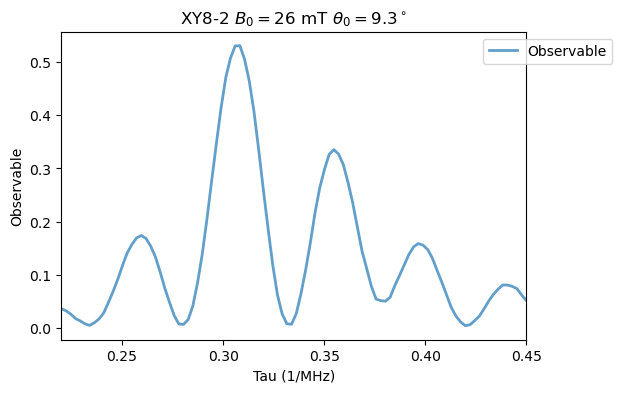

In [8]:
# 26 mT, 9.3 deg
qsys = NV(
    N=15,
    B0 = 26, 
    units_B0='mT',
    theta = 9.3,
    units_angles='deg'
)

XY8_15N  = XY8(
    M=2,
    free_duration = np.linspace(.22, .45, 100), # free evolution time in us
    pi_pulse_duration = 1/2/w1, # pi-pulse duration in us
    system = qsys, # NV center system
    H1 = w1*qsys.MW_H1, # control Hamiltonian
    pulse_params = {'f_pulse': qsys.MW_freqs[1]} # MW frequency for the ms=0 --> ms=+1 state transition
)

XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-2 $B_0=26$ mT $\theta_0=9.3^\circ$')

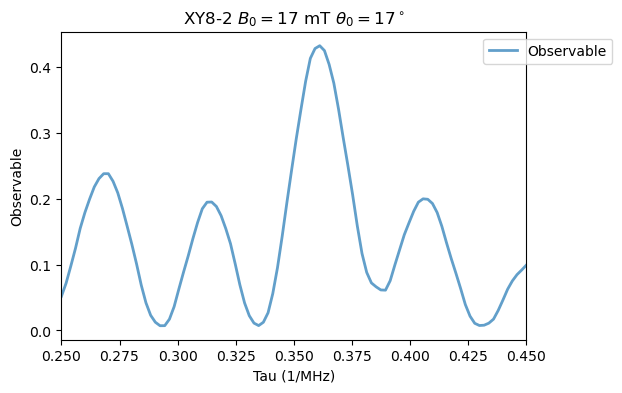

In [21]:
# 17 mT, 17 deg
qsys = NV(
    N=15, # here we start considering the 15N nuclear spin
    B0 = 17, # external magnetic field in mT
    units_B0='mT',
    theta=17, # 17 degrees os misalignment
    units_angles='deg'
)

XY8_15N  = XY8(
    M=2,
    free_duration = np.linspace(.25, .45, 100), # free evolution time in us
    pi_pulse_duration = 1/2/w1, # pi-pulse duration in us
    system = qsys, # NV center system
    H1 = w1*qsys.MW_H1, # control Hamiltonian
    pulse_params = {'f_pulse': qsys.MW_freqs[1]} # MW frequency for the ms=0 --> ms=+1 state transition
)

XY8_15N.run()
Analysis(XY8_15N).plot_results(title=r'XY8-2 $B_0=17$ mT $\theta_0=17^\circ$')

If we now include a pulse length error, as in Fig. 6 we have:

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_58668/3959528906.py:11: SyntaxWarning: invalid escape sequence '\c'
  Analysis(XY8_15N).plot_results(title='XY8-2 $B_0=17$ mT $\theta_0=17^\circ$, pulse lenght=0.8 $t_{\pi}$')


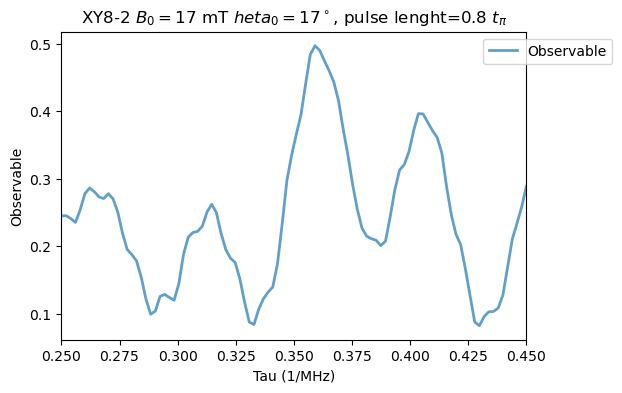

In [22]:
XY8_15N  = XY8(
    M=2,
    free_duration = np.linspace(.25, .45, 100), 
    pi_pulse_duration = 1/2/w1*.8,
    system = qsys,
    H1 = w1*qsys.MW_H1,
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}
)

XY8_15N.run()
Analysis(XY8_15N).plot_results(title='XY8-2 $B_0=17$ mT $\theta_0=17^\circ$, pulse lenght=0.8 $t_{\pi}$')

# 2. <a id='toc2_'></a>[13C Couling](#toc0_)

As in Sec. IV B, we need to define the coupling Hamiltonian $H_2$ in the same way as Eq 3 of the paper.

In [ ]:
# define the coupling tensor as in Sec S5 of the paper
A = np.empty((3, 3), dtype=object)
A[0, 0] = -0.25
A[0, 1] = -1.85
A[0, 2] = -.49
A[1, 0] = A[0, 1]
A[1, 1] = 0
A[1, 2] = .01
A[2, 0] = A[0, 2]
A[2, 1] = A[1, 2]
A[2, 2] = 1.01

HhfC = (
A[0,0]*tensor(jmat(1,'x'), qeye(3), jmat(1/2,'x')) + A[0,1]*tensor(jmat(1,'x'), qeye(3), jmat(1/2,'y')) + A[0,2]*tensor(jmat(1,'x'), qeye(3), jmat(1/2,'z'))
+ A[1,0]*tensor(jmat(1,'y'), qeye(3), jmat(1/2,'x')) + A[1,1]*tensor(jmat(1,'y'), qeye(3),jmat(1/2,'y')) + A[1,2]*tensor(jmat(1,'y'), qeye(3), jmat(1/2,'z'))
+ A[2,0]*tensor(jmat(1,'z'), qeye(3),  jmat(1/2,'x')) + A[2,1]*tensor(jmat(1,'z'), qeye(3), jmat(1/2,'y')) + A[2,2]*tensor(jmat(1,'z'), qeye(3), jmat(1/2,'z'))
)

# define the nuclear Zeeman Hamiltonian for the 13C nuclear spin
def Hzc(B0, theta):
    return 10.705e-3*B0*tensor(qeye(3), qeye(3), np.cos(theta*np.pi/180)*jmat(1/2,'z') + np.sin(theta*np.pi/180)*jmat(1/2,'x'))

Now we define the NV Hamiltonian and use the add_spin method to introduce the 13C nuclear spin.

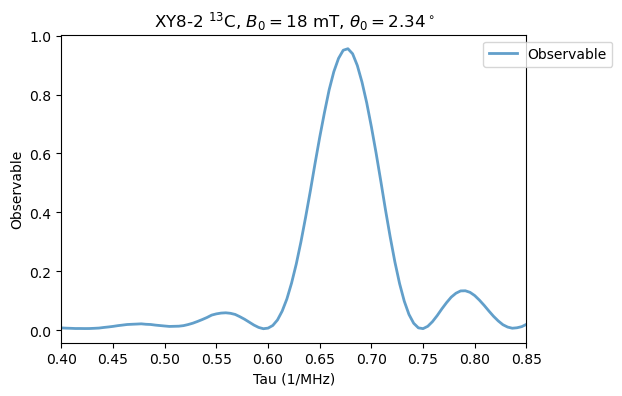

In [24]:
qsys = NV(
    N=14,
    B0 = 18, # external magnetic field in mT
    units_B0='mT',
    theta=2.34,
    units_angles='deg',
)

qsys.add_spin(HhfC + Hzc(qsys.B0, qsys.theta))

XY8_13C  = XY8(
    M=2,
    free_duration = np.linspace(.4, .85, 100), 
    pi_pulse_duration = 1/2/w1,
    system = qsys,
    H1 = w1*tensor(qsys.MW_H1, qeye(2)),
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}
)

XY8_13C.run()
Analysis(XY8_13C).plot_results(title=r'XY8-2 $^{13}$C, $B_0=18$ mT, $\theta_0=2.34^\circ$')

Increasing the field, as in Fig. 4 (a).

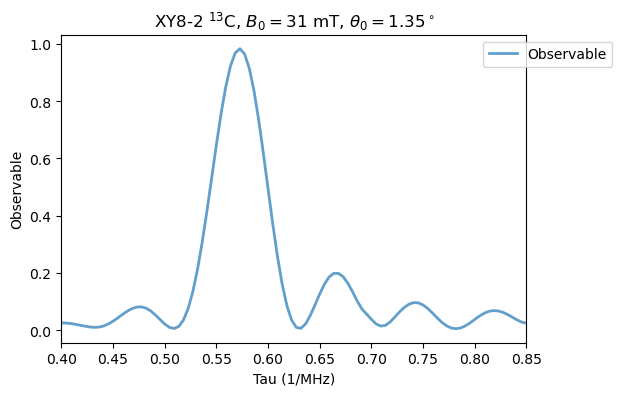

In [9]:
# define the NV center system
qsys = NV(
    N=14,
    B0 = 31, # external magnetic field in mT
    units_B0='mT',
    theta=1.35,
    units_angles='deg',
)

qsys.add_spin(HhfC + Hzc(qsys.B0, qsys.theta))

XY8_13C  = XY8(
    M=2,
    free_duration = np.linspace(.4, .85, 100), 
    pi_pulse_duration = 1/2/w1,
    system = qsys,
    H1 = w1*tensor(qsys.MW_H1, qeye(2)),
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}
)

XY8_13C.run()
Analysis(XY8_13C).plot_results(title=r'XY8-2 $^{13}$C, $B_0=31$ mT, $\theta_0=1.35^\circ$')

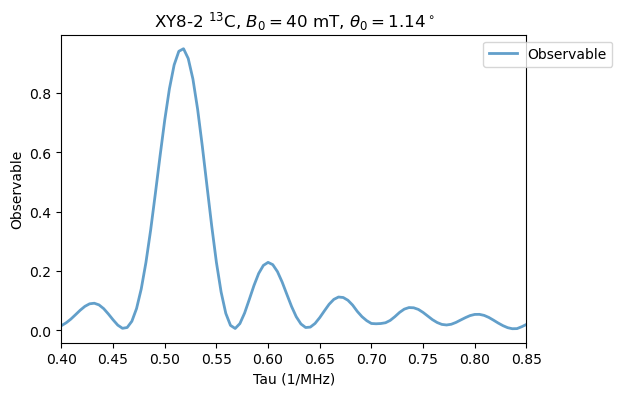

In [25]:
# define the NV center system
qsys = NV(
    N=14,
    B0 = 40, # external magnetic field in mT
    units_B0='mT',
    theta=1.14,
    units_angles='deg',
)

qsys.add_spin(HhfC + Hzc(qsys.B0, qsys.theta))

XY8_13C  = XY8(
    M=2,
    free_duration = np.linspace(.4, .85, 100), 
    pi_pulse_duration = 1/2/w1,
    system = qsys,
    H1 = w1*tensor(qsys.MW_H1, qeye(2)),
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}
)

XY8_13C.run()
Analysis(XY8_13C).plot_results(title=r'XY8-2 $^{13}$C, $B_0=40$ mT, $\theta_0=1.14^\circ$')

Now, we keep the field constant and increase the order, as in Fig. 4(b).

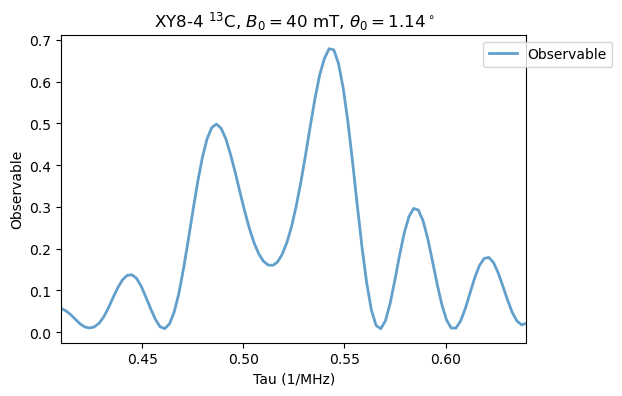

In [17]:
XY8_13C  = XY8(
    M=4,
    free_duration = np.linspace(.41, .64, 100), 
    pi_pulse_duration = 1/2/w1,
    system = qsys,
    H1 = w1*tensor(qsys.MW_H1, qeye(2)),
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}
)

XY8_13C.run()
Analysis(XY8_13C).plot_results(title=r'XY8-4 $^{13}$C, $B_0=40$ mT, $\theta_0=1.14^\circ$')

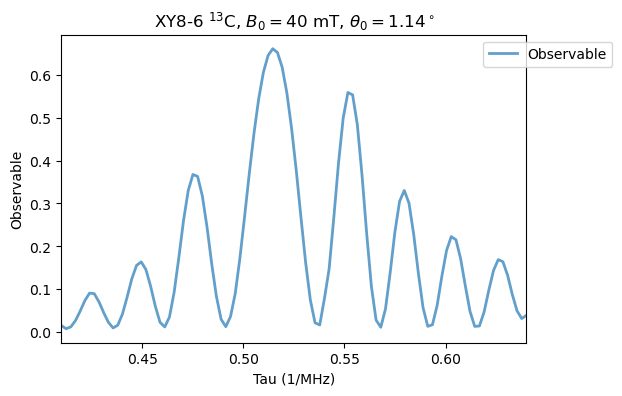

In [18]:
XY8_13C  = XY8(
    M=6,
    free_duration = np.linspace(.41, .64, 100), 
    pi_pulse_duration = 1/2/w1,
    system = qsys,
    H1 = w1*tensor(qsys.MW_H1, qeye(2)),
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}
)

XY8_13C.run()
Analysis(XY8_13C).plot_results(title=r'XY8-6 $^{13}$C, $B_0=40$ mT, $\theta_0=1.14^\circ$')

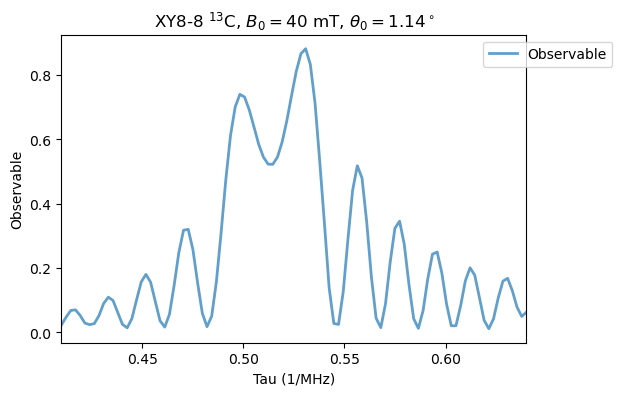

In [19]:
XY8_13C  = XY8(
    M=8,
    free_duration = np.linspace(.41, .64, 100), 
    pi_pulse_duration = 1/2/w1,
    system = qsys,
    H1 = w1*tensor(qsys.MW_H1, qeye(2)),
    pulse_params = {'f_pulse': qsys.MW_freqs[1]}
)

XY8_13C.run()
Analysis(XY8_13C).plot_results(title=r'XY8-8 $^{13}$C, $B_0=40$ mT, $\theta_0=1.14^\circ$')

# 3. <a id='toc3_'></a>[RXY8 with H2](#toc0_)

As discussed in Sec. IV C, the finite length of the pulses can lead to ambiguous resonances. Here, we define the NV Hamiltonian as usual and a time-dependent magnetic field $B_2(t)$ as in Eq. 4.

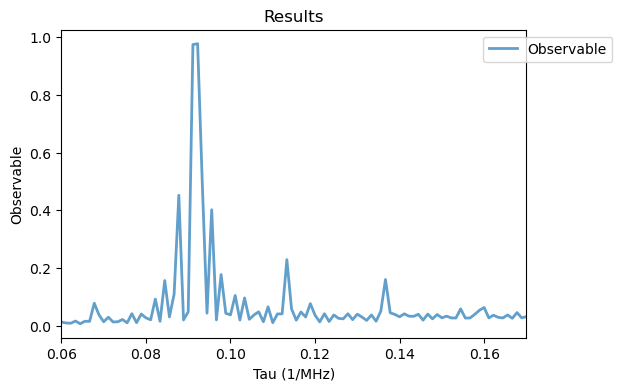

In [8]:
qsys = NV(
    N=15, # here we start considering the 15N nuclear spin
    B0 = 40, # external magnetic field in mT
    units_B0='mT',
)

w1 = 20
f2 = 5.5
B2z = 0.3

def B2(t, args):
    return B2z*np.sin(f2*t)

H2 = [tensor(jmat(1,'z'), qeye(2)), B2]      

XY8_12_H2  = XY8(
    M=12,
    free_duration = np.linspace(.06, 0.17, 100), # free evolution time in us
    pi_pulse_duration = 1/2/w1, # pi-pulse duration in us
    system = qsys, # NV center system
    H1 = w1*qsys.MW_H1, # control Hamiltonian
    pulse_params = {'f_pulse': qsys.MW_freqs[0]},
    H2 = H2
)
XY8_12_H2.run()
Analysis(XY8_12_H2).plot_results()

These ambiguous resonances can be supressed with phase randomization, for that we use the RXY8 class.

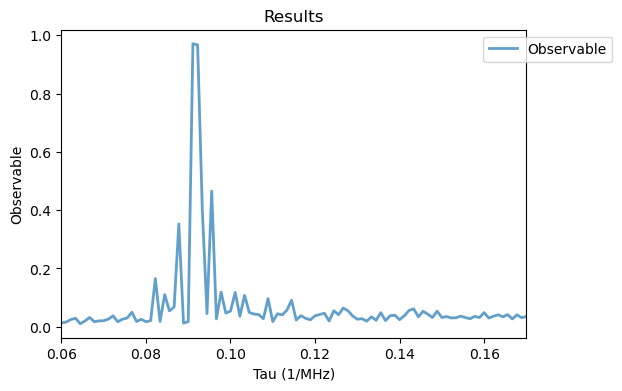

In [ ]:
RXY8_12_H2  = RXY8(
    M=12,
    free_duration = np.linspace(.06, 0.17, 100), # free evolution time in us
    pi_pulse_duration = 1/2/w1, # pi-pulse duration in us
    system = qsys, # NV center system
    H1 = w1*qsys.MW_H1, # control Hamiltonian
    pulse_params = {'f_pulse': qsys.MW_freqs[0]},
    H2 = H2
)

RXY8_12_H2.run()
Analysis(RXY8_12_H2).plot_results()